### Pea Island Beach Monitoring Project - Heavy Mineral Analysis

-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

### Pre-Photo Correction Data:

In [2]:
fp='/Users/paulp/Documents/t/'
#'/Volumes/R_Research/Coastal_Processes/PeaIsland_BeachMonitoring/HeavyMineralScopeWork/Paul/'
f='HeavyMineralAnalysis.csv'

df=pd.read_csv(fp+f, header=0)
df.sort_values(['YEARMO','SITE','SM'], ascending=True, inplace=True)
df.dtypes

YEARMOSITE     object
YEARMO          int64
SITE           object
SM             object
DP            float64
dtype: object

#### Add a transect group (control vs treatment) field to dataframe df:

In [3]:
### Add a field GRP (Group) to df identifying each record as belonging to a control or  
### treatment transect (Cnn vs Tnn):
## to do this parse the values in the SITE field...
df.loc[df['SITE'].str[0] == 'C', 'GRP'] ='control'
df.loc[df['SITE'].str[0] =='T', 'GRP'] = 'treatment'
df

,YEARMOSITE,YEARMO,SITE,SM,DP,GRP
965,201407C01S1,201407,C01,S1,2.965404,control
966,201407C01S2,201407,C01,S2,3.930131,control
967,201407C01S3,201407,C01,S3,2.323009,control
968,201407C01S4,201407,C01,S4,3.386454,control
969,201407C02S1,201407,C02,S1,1.094391,control
970,201407C02S2,201407,C02,S2,1.357466,control
971,201407C02S3,201407,C02,S3,1.911381,control
972,201407C02S4,201407,C02,S4,1.942857,control
973,201407C03S1,201407,C03,S1,0.966184,control
974,201407C03S2,201407,C03,S2,1.058201,control


#### Pivot Tables:

In [25]:
### Pivot table - Dark mineral percentage by transect:
pd.pivot_table(df, index='SITE', values='DP')

,DP
SITE,
C01,5.751308
C02,8.663230
C03,5.807508
C04,5.327573
C05,7.465687
C06,7.768883
C07,7.086981
C08,7.405047
C09,8.623353


In [9]:
### Pivot table - Dark mineral percentage by sample (beach position):
### NOTE: S1 is in the swash zone; S2 is berm; S3 is back beach; S4 is dune toe; and S5 is mid-beach (a later addition)
pd.pivot_table(df, index='SM', values='DP')

,DP
SM,
S1,8.093628
S2,5.289497
S3,4.403949
S4,8.845242
S5,9.088607


In [35]:
### Pivot table - Dark mineral percentage by survey (year and month):
pd.pivot_table(df, index=['YEARMO'], values='DP')

,DP
YEARMO,
201407,3.976429
201409,4.916523
201504,4.750254
201508,3.349474
201510,7.755031
201602,8.660696
201605,8.258544
201608,9.103969
201610,23.800557


#### Plots:

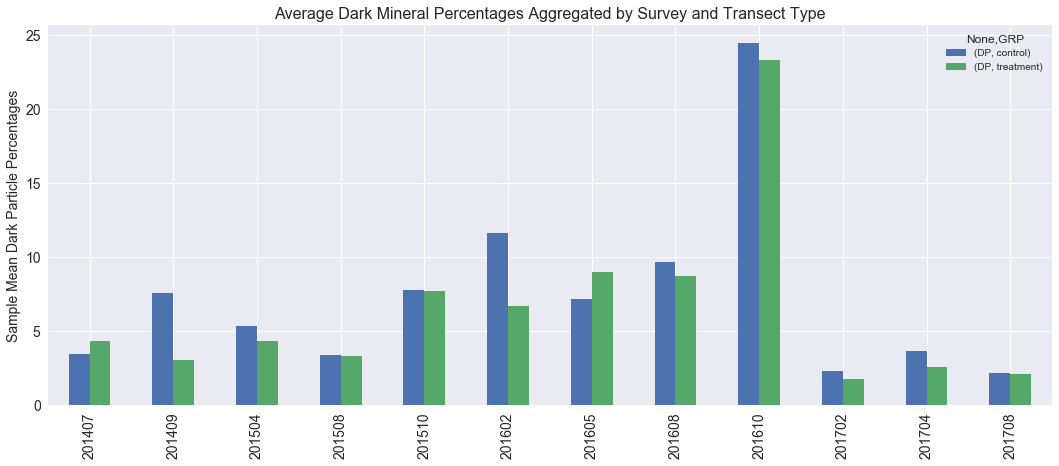

In [4]:
### Pivot table/plot - Dark mineral percentage (mean) by survey, by transect type (GRP) Averaged over transect type: 

pd.pivot_table(df, index=['YEARMO'], columns=['GRP'], values=['DP']).plot(kind='Bar', figsize=(18,7))

plt.xlabel('')
plt.ylabel('Sample Mean Dark Particle Percentages', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Dark Mineral Percentages Aggregated by Survey and Transect Type', fontsize=16)

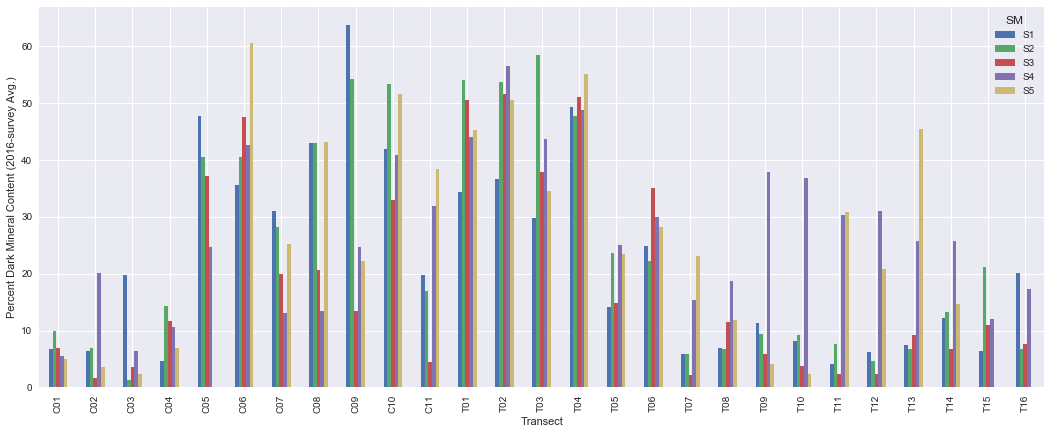

In [24]:
### Plot Percent Dark Particles by Survey, by Transect, by Transect Sample:

fig0 = plt.figure(figsize=(18,7))
ax0=fig0.add_subplot(1,1,1)

pd.pivot_table(df[df['YEARMO']==201610], index='SITE', columns='SM', values='DP').plot(kind='bar', ax=ax0)

ax0.set_ylabel('Percent Dark Mineral Content (2016-survey Avg.)')
ax0.set_xlabel('Transect')

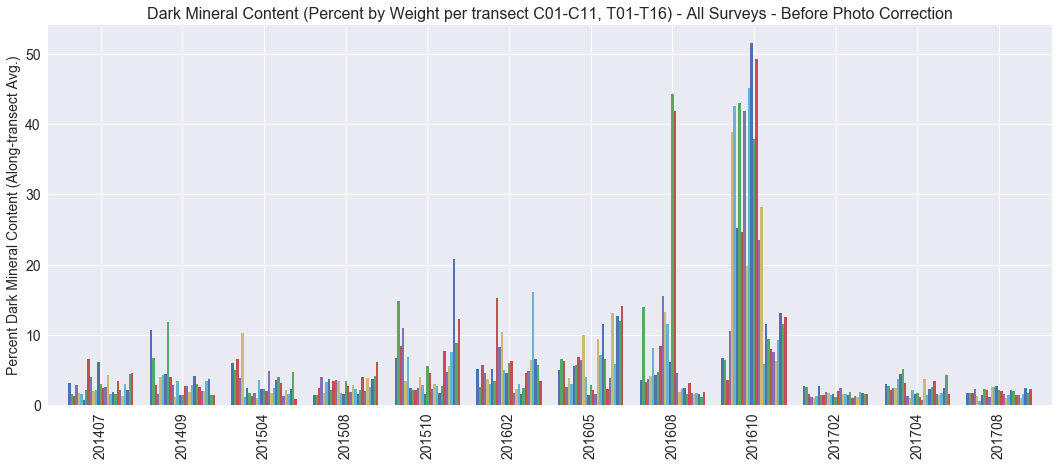

In [17]:
### Plot of Dark Particle Percents by Survey by transect (transect averaged):

pd.pivot_table(df, index='YEARMO', columns='SITE', aggfunc=(np.median), values='DP').plot(kind='bar', figsize=(18,7), legend=False,
                                                                    width=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Percent Dark Mineral Content (Along-transect Avg.)', fontsize=14)
plt.xlabel('')
plt.title('Dark Mineral Content (Percent by Weight per transect C01-C11, T01-T16) - All Surveys - Before Photo Correction',
         fontsize=16)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/PercentDMCTransect_BeforeCorr.pdf')

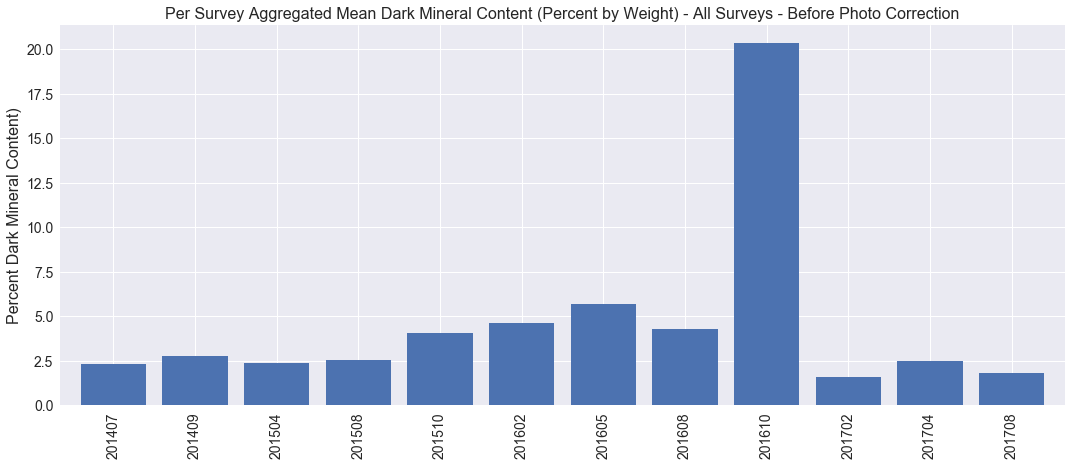

In [16]:
### Plot aggregated (mean) Dark Particle Percentages by survey: 

pd.pivot_table(df, index='YEARMO', values='DP', aggfunc=(np.median)).plot(kind='bar', figsize=(18,7), legend=False,
                                                                           width=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Percent Dark Mineral Content)', fontsize=16)
plt.xlabel('')
plt.title('Per Survey Aggregated Mean Dark Mineral Content (Percent by Weight) - All Surveys - Before Photo Correction', fontsize=16)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/PercentDMCSurvey_BeforeCorr.pdf')

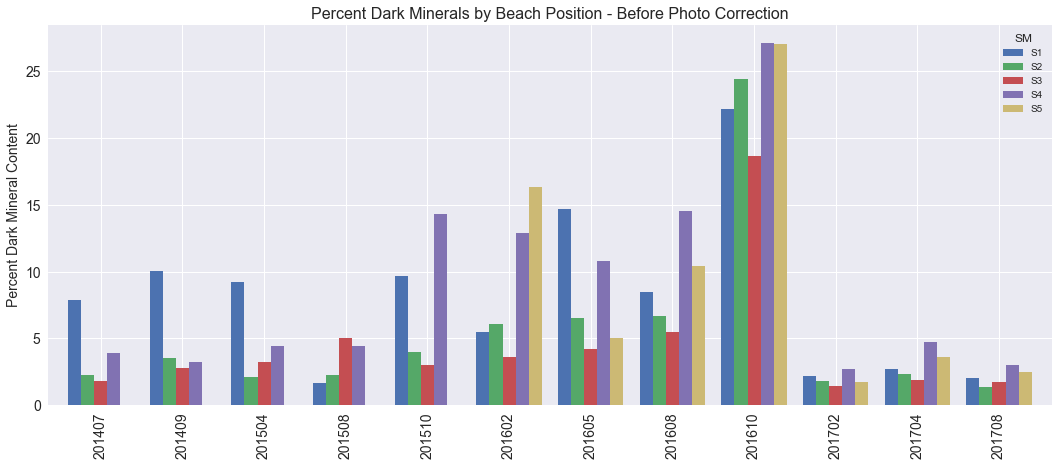

In [29]:
### Change in dark mineral percentages thru time based on beach position (e.g., swash zone S1; mid-beach-S5; 
### dune toe-S4)...a plot:

pd.pivot_table(df, index='YEARMO', columns='SM', values='DP').plot(kind='bar', figsize=(18,7), width=0.8)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Percent Dark Mineral Content', fontsize=14)
plt.title('Percent Dark Minerals by Beach Position - Before Photo Correction', fontsize=16)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/DPbyBeachPosition_beforeCorr.pdf')

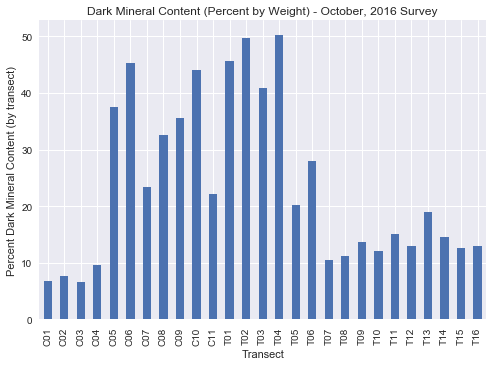

In [10]:
pd.pivot_table(df[df['YEARMO']==201610], index='SITE', values='DP').plot(kind='bar', legend=False)
plt.xlabel('Transect')
plt.ylabel('Percent Dark Mineral Content (by transect)')
plt.title('Dark Mineral Content (Percent by Weight) - October, 2016 Survey')

## Post Photo Correction Data:

A correction was applied to every sample photo captured for the Pea Island heavy mineral analysis. This correction consisted of:

- remapping both the white and black points for each of the three color channels (red, green, and blue) to better 'center' the distribution of tones in the images. The white point was mapped to a tone representing the brighted pixel value(s) seen in the image. The black point was simialrly adjusted to match the darkest pixel(s).
- contrast was reduced (the imaged was flattened) across all three channels equally by 28%. 

### Load and prep the Fiji-generated individual image dark particle counts to produce dark particle percentages:

In [5]:
### 1.) Load all 12 image particle analysis summary files into a clean pandas dataframe:
fp='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/data/HeavyMineralAnalysis/ParticleCntSummaries/'
files=['201407/201407_Summary_01.csv', '201409/201409_Summary_01.csv', '201504/201504_Summary_01.csv',
  '201508/201508_Summary_01.csv', '201510/201510_Summary_01.csv', '201602/201602_Summary_01.csv',
  '201605/201605_Summary_01.csv', '201608/201608_Summary_01.csv', '201610/201610_Summary_01.csv',
   '201702/201702_Summary_01.csv', '201704/201704_Summary_01.csv', '201708/201708_Summary_01.csv']

#_Original
dfp=pd.DataFrame()   # initial empty dataframe

for file in files:
    print('Loading file', file,'...')
    df_=pd.read_csv(fp+file, header=0)
    dfp = dfp.append(df_,ignore_index=True)
    
    
### 2.) extract a the year, survey id (e.g. 201708), transect id (e.g., C01), sample number (e.g., S1), 
### and image identifier (e.g., I1), then load these as new attributes into new dataframe fields/columns:

dfp['Year']=dfp['Slice'].str[0:4]
dfp['Survey']=dfp['Slice'].str[0:6]
dfp['Transect_id']=dfp['Slice'].str[7:10]  
dfp['Sample_id']=dfp['Slice'].str[11:13]
dfp['image_id']=dfp['Slice'].str[14:17]


### 3.) Add a field GRP (Group) to df identifying each record as belonging to a control or  
### treatment transect (Cnn vs Tnn):
## to do this parse the values in the Slice field...
dfp.loc[dfp['Slice'].str[7] == 'C', 'GRP'] ='control'
dfp.loc[dfp['Slice'].str[7] =='T', 'GRP'] = 'treatment'
    
### 4.) add additional field/column that identifies record as representing a dark mineral count:
#for i in range(0, len(df),2):
dfp['Image_type']=np.nan
dfp['Image_type'].iloc[::2]='Dark'
dfp['Image_type'].iloc[1::2]='Light' 


### 5.) Compute the dark particle (heavy mineral) percentages for image:
### note the lambda function is embedded inside the aggfunc list!
#def remove_outliers(values):
#    return( np.mean( values.quantile([.25, .75]) ) )

def ComputeDarkParticlePercentage(df_):
    dfk = df_[df_['Image_type'] == 'Dark']['Count'].sum()   # total dark particle count
    dft=df_['Count'].sum()  # total light and dark particle count
    
    df_['DP'] = (dfk/dft)*100
    
    return ( df_ )

### lambda x: x[x['Image_type'] == 'Dark']['Count'].sum()

#dft=dfp.groupby(['Survey','Transect_id','Sample_id'])['Count'].sum()  
dfp=dfp.groupby(['Survey','Transect_id','Sample_id'])['Survey', 'Transect_id','Sample_id','Count',
                                                    'Image_type', 'GRP'].apply( ComputeDarkParticlePercentage )

# 6.) drop the records with duplicated dark particle (DP) percentages. This leaves us with a single record 
# (dark particle percentage) for each transect/sample site:
dfp=dfp.drop_duplicates(['Survey','DP'], keep='first')

### 7.) 
print('All files loaded, wrangled, and ready...')
#dfp

Loading file 201407/201407_Summary_01.csv ...
Loading file 201409/201409_Summary_01.csv ...
Loading file 201504/201504_Summary_01.csv ...
Loading file 201508/201508_Summary_01.csv ...
Loading file 201510/201510_Summary_01.csv ...
Loading file 201602/201602_Summary_01.csv ...
Loading file 201605/201605_Summary_01.csv ...
Loading file 201608/201608_Summary_01.csv ...
Loading file 201610/201610_Summary_01.csv ...
Loading file 201702/201702_Summary_01.csv ...
Loading file 201704/201704_Summary_01.csv ...
Loading file 201708/201708_Summary_01.csv ...


/Applications/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


All files loaded, wrangled, and ready...


In [20]:
dfp[dfp['Survey'] == '201602']
dfp

,Survey,Transect_id,Sample_id,Count,Image_type,GRP,DP
0,201407,C01,S1,3,Dark,control,1.839465
6,201407,C01,S2,15,Dark,control,4.864865
12,201407,C01,S3,13,Dark,control,3.925845
18,201407,C01,S4,13,Dark,control,3.688933
24,201407,C02,S1,4,Dark,control,2.170963
30,201407,C02,S2,11,Dark,control,2.267574
36,201407,C02,S3,12,Dark,control,2.859619
42,201407,C02,S4,6,Dark,control,2.844141
48,201407,C03,S1,4,Dark,control,2.073365
54,201407,C03,S2,3,Dark,control,2.108963


In [28]:
### Compute Global Mean and Standard Deviatio for Dark Particle percentage (DP):
print('Global (all samples) Mean % Dark Minerals:', dfp['DP'].mean() )
print('Global Standard Deviation % Dark Minerals:', dfp['DP'].std() )

Global (all samples) Mean % Dark Minerals: 3.94804425013
Global Standard Deviation % Dark Minerals: 2.14482493726


In [24]:
### Compute Mean and Standard Deviation for Dark Mineral percentage (DP) for each beach
### sampling position (S1-S5):

tbl=pd.pivot_table(dfp, index='Sample_id',values='DP', aggfunc=[np.mean, np.std])
tbl

,mean,std
,DP,DP
Sample_id,,
S1,3.544165,2.167627
S2,3.176307,1.626045
S3,3.372406,1.743234
S4,5.176608,2.120773
S5,4.980760,2.335199


In [32]:
### Find the records which harbor dark particle count percentages >= 10%:
#dfp[dfp['DP'] >= dfp['DP'].max()]
dfp.loc[dfp['DP'] >= 10.00]

,Survey,Transect_id,Sample_id,Count,Image_type,DP
2468,201510,C02,S1,11,Dark,11.602210
2996,201510,T14,S1,14,Dark,18.750000
3092,201602,C02,S1,11,Dark,11.602210
3620,201602,T14,S1,14,Dark,18.750000
4412,201605,T16,S1,4,Dark,11.016949
6062,201702,C01,S4,20,Dark,12.500000
6332,201702,C10,S4,21,Dark,11.132438
6632,201702,T09,S4,30,Dark,11.753731
6932,201704,C03,S4,34,Dark,10.319410
7202,201704,T01,S4,17,Dark,13.865546


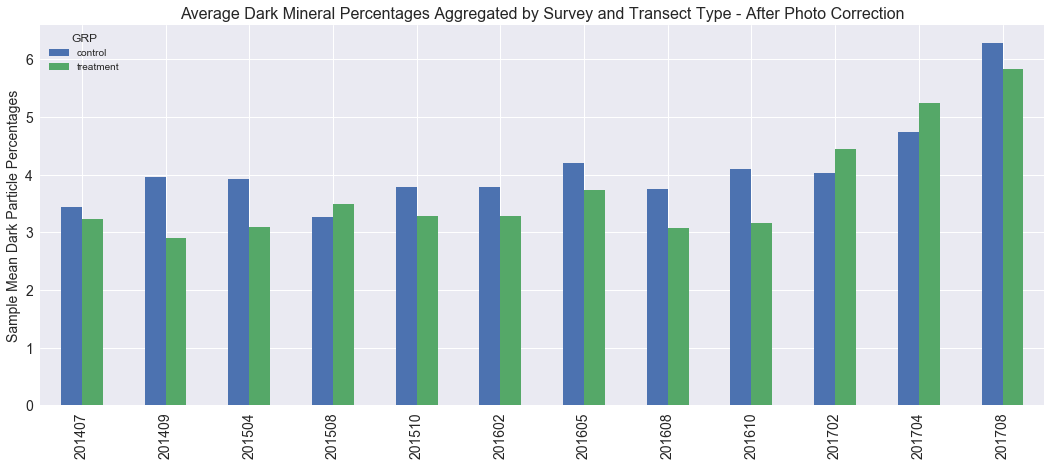

In [26]:
pd.pivot_table(dfp, index='Survey', columns='GRP', values='DP').plot(kind='bar', figsize=(18,7), legend=True)

plt.xlabel('')
plt.ylabel('Sample Mean Dark Particle Percentages', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Dark Mineral Percentages Aggregated by Survey and Transect Type - After Photo Correction', fontsize=16)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/DMPAggBySurveyTransectGrp_AfterCorr.pdf')

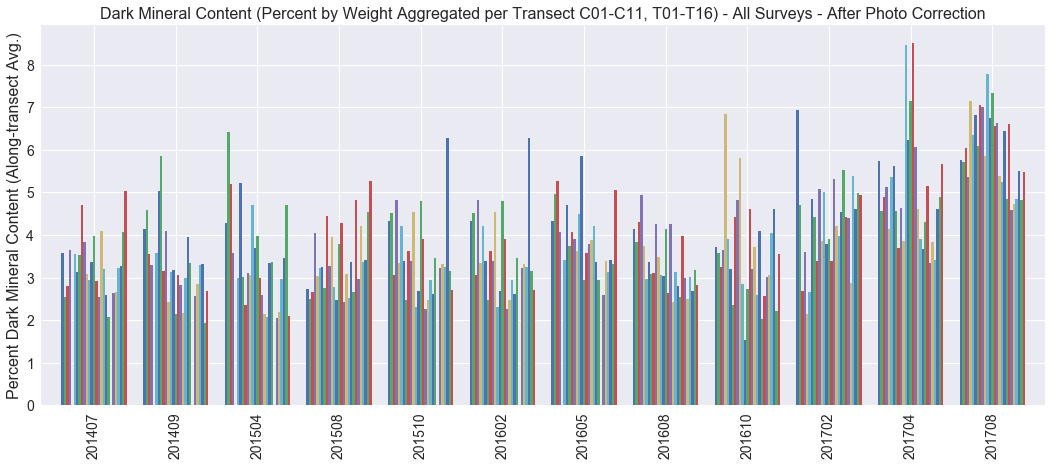

In [27]:
pd.pivot_table(dfp, index='Survey', columns='Transect_id', values='DP').plot(kind='bar', figsize=(18,7), legend=False,
                                                                    width=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Percent Dark Mineral Content (Along-transect Avg.)', fontsize=16)
plt.xlabel('')
plt.title('Dark Mineral Content (Percent by Weight Aggregated per Transect C01-C11, T01-T16) - All Surveys - After Photo Correction',
         fontsize=16)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/PercentDMCTransect_AfterCorr.pdf')

In [26]:
dfp

,Survey,Transect_id,Sample_id,Count,Image_type,GRP,DP
0,201407,C01,S1,3,Dark,control,1.839465
6,201407,C01,S2,15,Dark,control,4.864865
12,201407,C01,S3,13,Dark,control,3.925845
18,201407,C01,S4,13,Dark,control,3.688933
24,201407,C02,S1,4,Dark,control,2.170963
30,201407,C02,S2,11,Dark,control,2.267574
36,201407,C02,S3,12,Dark,control,2.859619
42,201407,C02,S4,6,Dark,control,2.844141
48,201407,C03,S1,4,Dark,control,2.073365
54,201407,C03,S2,3,Dark,control,2.108963


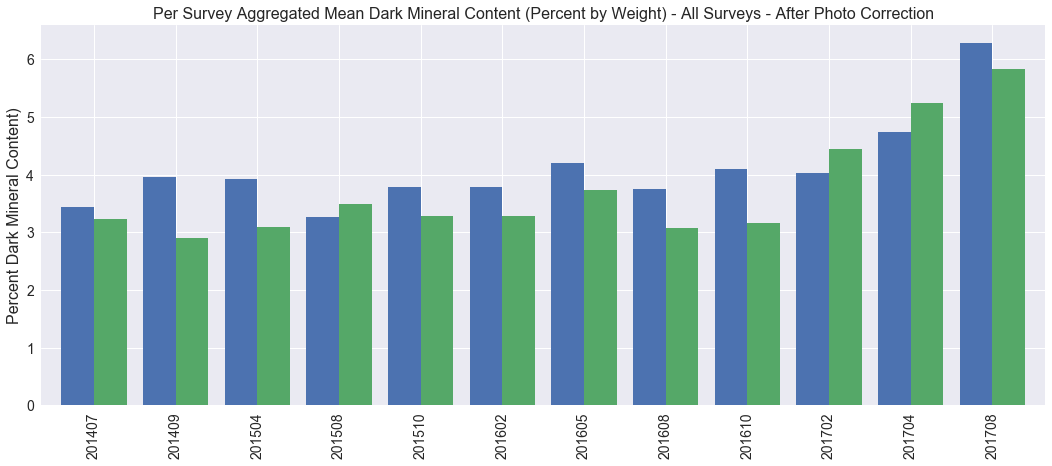

In [28]:
### Bar Plot of Dark Mineral Percentage Aggregated by Survey by Control vs Treatment:
pd.pivot_table(dfp, index='Survey', columns='GRP', values='DP', aggfunc=(np.mean)).plot(kind='bar', figsize=(18,7), legend=False,
                                                                        width=0.8) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Percent Dark Mineral Content)', fontsize=16)
plt.xlabel('')
plt.title('Per Survey Aggregated Mean Dark Mineral Content (Percent by Weight) - All Surveys - After Photo Correction', fontsize=16)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/PercentDMCSurvey_AfterCorr.pdf')

In [80]:
### Dark Mineral Percentage Aggregated by Survey by Control vs Treatment (tablular presentation):
dfp.groupby(['Survey','GRP'])['DP'].median().reset_index()  

,Survey,GRP,DP
0,201407,control,3.048455
1,201407,treatment,2.975207
2,201409,control,4.013329
3,201409,treatment,2.791114
4,201504,control,3.362047
5,201504,treatment,3.072627
6,201508,control,2.792577
7,201508,treatment,3.095138
8,201510,control,3.563241
9,201510,treatment,3.022763


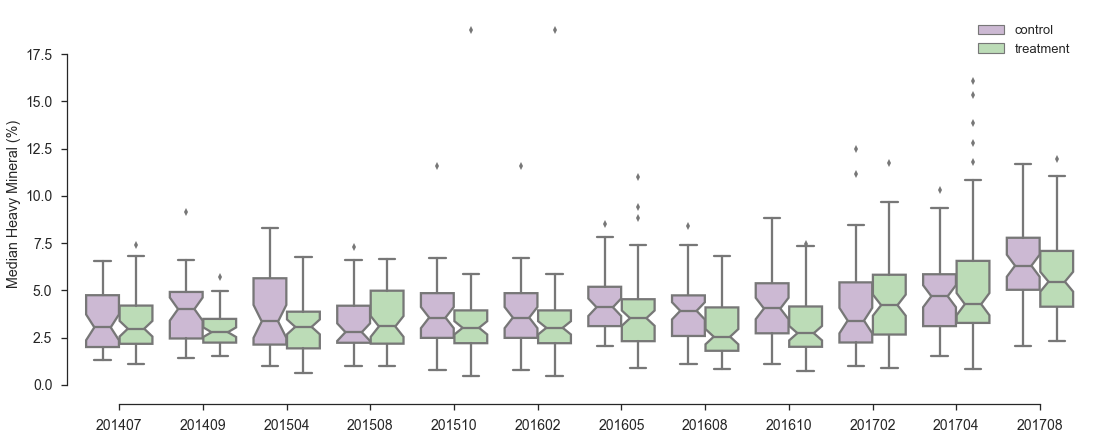

In [13]:
sns.set(style="ticks")
sns.set_context('talk')

### Box plot(s) of Dark Mineral Percentage Aggregated by Survey by Control vs Treatment:
#tbl01=dfp.groupby(['Survey','GRP'])['DP'].mean().reset_index()   #plot(kind='box',legend=True)
plt.figure(figsize=(18,7))
#sns.set()  #sns.set(style='ticks')
g=sns.boxplot(x='Survey', y='DP',hue='GRP', data=dfp, width=0.8, palette='PRGn', notch=True )
sns.despine(offset=10, trim=True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Median Heavy Mineral (%)')
#plt.title('Dark Mineral Percentages, Aggregated by Survey, by Transect Type (Control vs Treatment)', fontsize=18)
plt.legend(loc='best')
plt.savefig( '/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/HeavyMineralAnalysis/DMPBoxplots_AfterCorr.pdf')
            
### '/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis

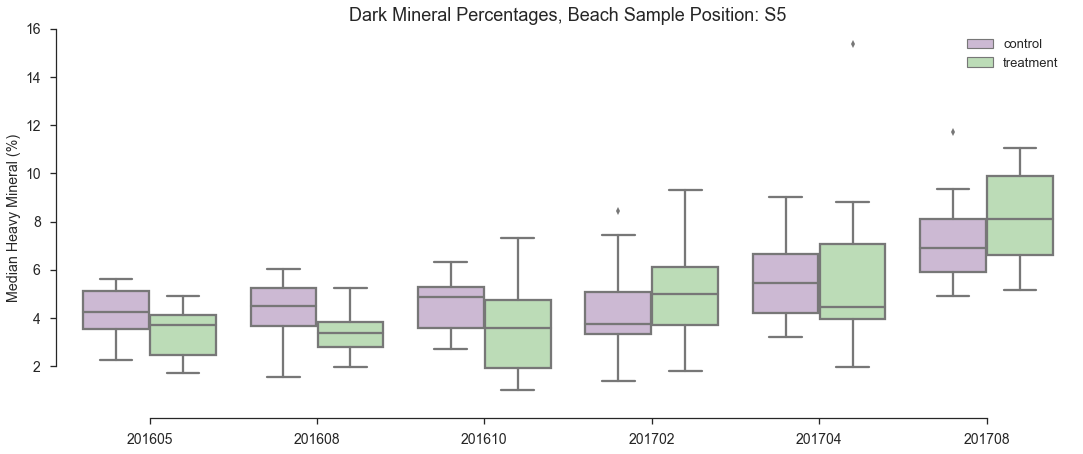

In [51]:
sns.set(style="ticks")
sns.set_context('talk')

smpl='S5'
dfpbx=dfp.loc[dfp['Sample_id']==smpl]

### Box plot(s) of Dark Mineral Percentage Aggregated by Survey by Control vs Treatment:
#tbl01=dfp.groupby(['Survey','GRP'])['DP'].mean().reset_index()   #plot(kind='box',legend=True)
plt.figure(figsize=(18,7))
#sns.set()  #sns.set(style='ticks')
g=sns.boxplot(x='Survey', y='DP',hue='GRP', data=dfpbx, width=0.8, palette='PRGn', notch=False )
sns.despine(offset=10, trim=True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Median Heavy Mineral (%)')
plt.title('Dark Mineral Percentages, Beach Sample Position: '+smpl, fontsize=18)
plt.legend(loc='best')
plt.savefig( '/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/HeavyMineralAnalysis/DMPBoxplots_'+smpl+'.pdf')

In [41]:
smpl='S1'
dfpbx=dfp.loc[dfp['Sample_id']==smpl]
dfpbx

,Survey,Transect_id,Sample_id,Count,Image_type,GRP,DP
0,201407,C01,S1,3,Dark,control,1.839465
24,201407,C02,S1,4,Dark,control,2.170963
48,201407,C03,S1,4,Dark,control,2.073365
72,201407,C04,S1,9,Dark,control,2.748092
96,201407,C06,S1,2,Dark,control,1.683502
120,201407,C07,S1,2,Dark,control,3.829787
144,201407,C08,S1,4,Dark,control,4.569892
168,201407,C09,S1,5,Dark,control,5.752212
192,201407,C10,S1,6,Dark,control,6.557377
216,201407,C11,S1,11,Dark,control,4.504505


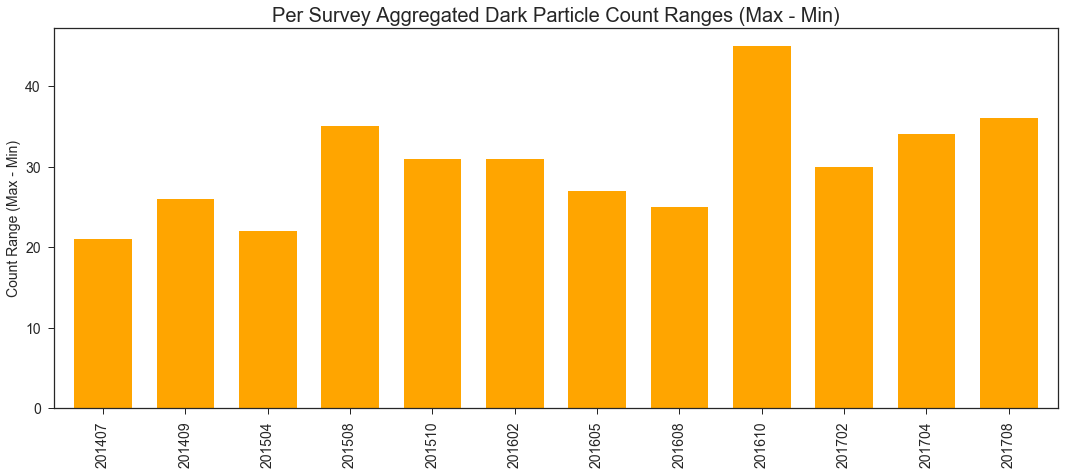

In [72]:
### compute dark mineral particle count ranges and plot these on the pivot table plot figure...
def ComputeRanges(df_):
    return( df_.groupby(['Survey'])['Count'].max() )
  
xtics=['201407','201409','201504','201508','201510','201602','201605','201608','201610','201702','201704','201708']

dfp.groupby(by='Survey').apply( ComputeRanges ).plot(kind='bar', color='orange', figsize=(18,7), width=0.7 )

loc,t=plt.xticks()
plt.xticks(loc, xtics, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Count Range (Max - Min)',fontsize=14)
plt.title('Per Survey Aggregated Dark Particle Count Ranges (Max - Min)', fontsize=20)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/CntRangesDPCSurvey_AfterCorr.pdf')


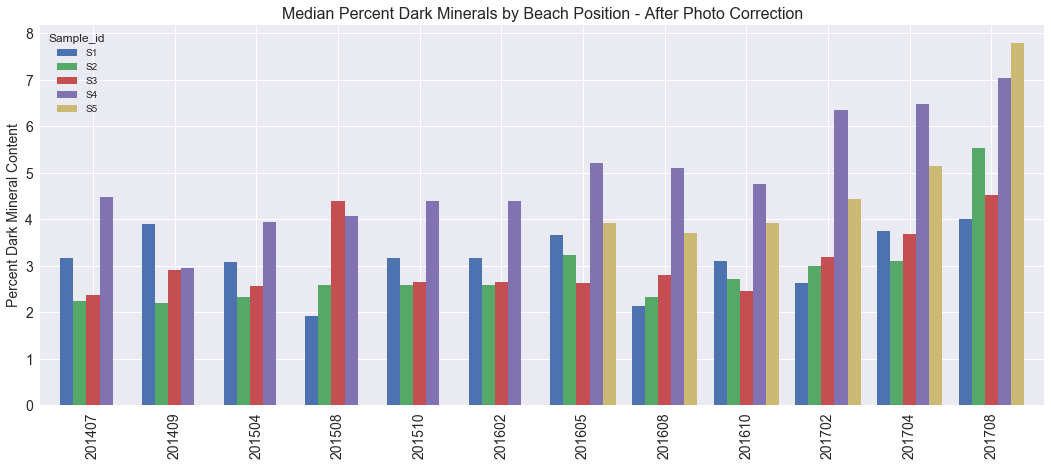

In [30]:
### Change in dark mineral percentages thru time based on beach position (e.g., swash zone S1; mid-beach-S5; 
### dune toe-S4)...a plot:

pd.pivot_table(dfp, index='Survey', columns='Sample_id', values='DP', aggfunc=(np.median)).plot(kind='bar', figsize=(18,7), width=0.8)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Percent Dark Mineral Content', fontsize=14)
plt.title('Median Percent Dark Minerals by Beach Position - After Photo Correction', fontsize=16)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/DPbyBeachPosition_afterCorr.pdf')

In [31]:
### Some samples in the 2017 survey set present high DMP returns. Let's explore the individual counts, comparing
### against visual interpretation as seen in the photographs. Consider adjusting values by hand, if/as needed.
### If a DMP is >= 10%, revisit photograph...
dfp.loc[(dfp['Survey'] == '201708') & (dfp['Sample_id'] == 'S5')]

,Survey,Transect_id,Sample_id,Count,Image_type,GRP,DP
7686,201708,C01,S5,19,Dark,control,6.316812
7716,201708,C02,S5,13,Dark,control,8.433735
7746,201708,C03,S5,18,Dark,control,11.700183
7776,201708,C04,S5,14,Dark,control,4.916318
7806,201708,C05,S5,14,Dark,control,5.779570
7836,201708,C06,S5,11,Dark,control,9.356725
7866,201708,C07,S5,19,Dark,control,6.060606
7896,201708,C08,S5,16,Dark,control,7.790143
7926,201708,C09,S5,9,Dark,control,7.824427
7956,201708,C10,S5,17,Dark,control,6.896552


** For Survey 201702:**
- C01 S4 reports 12.5%   photos suggest that this value is okay. NC
- C10 S4 reports 11.13%  photos suggest (rather strongly) that this value is okay. NC
- T09 S4 reports 11.75%  photos suggest that this value is okay, too. NC

** For Survey 201704:**
- C03 S4 reports 10.32%  photos show a lot of grain crowding, but plenty of dark particles are about. NC
- T01 S4 reports 13.87%  photos show dark minerals present, but high percentage likely due to sparsity of grains, overall. NC
- T03 S4 reports 11.78%  photos show dark particles present but overall low total particle (dark + light) counts. NC
- T05 S4 reports 12.82%  photos show dark particles present but overall total particle count low: For I1: L=30 D=4; For I2: L=40 D=16; For I3: L=104 D=19; Total L=174 Total D=39. Computed DMP=39/(174+39)=0.183 or about 18%, higher by about 5% over the imageJ estimate... NC
- T04 S5 reports 15.35%  photos show dark particles present but overall total particle count low (<200 estimated). NC

** For Survey 201708: **
- C03 S5 reports 11.70%  photos show dark particles present in moderate amounts. NC
- T02 S5 reports 10.42%  photos again show moderate amounts of dark particles. NC
- T04 S5 reports 11.07%  photos show limited dark particle counts. Sample recounts suggest 10% is likely a better estimate (adjusted)
- T05 S5 reports 10.05%  photos show moderate dark particle counts. NC


NC = No change to data record

In [24]:
### Locate specfic record (row) in dataframe and change one column (field) value:
dfp[(dfp['Survey'] == '201708') & (dfp['Transect_id'] == 'T04') & (dfp['Sample_id'] == 'S5')]  # this statement locates specific row

### change the value in the DP field from 11.067194 to 10.00
dfp['DP'][(dfp['Survey'] == '201708') & (dfp['Transect_id'] == 'T04') & (dfp['Sample_id'] == 'S5')]=10.0


In [25]:
dfp[(dfp['Survey'] == '201708') & (dfp['Transect_id'] == 'T04') & (dfp['Sample_id'] == 'S5')] 

,Survey,Transect_id,Sample_id,Count,Image_type,GRP,DP
8106,201708,T04,S5,19,Dark,treatment,10.0


In [8]:
dfp.dtypes

Survey          object
Transect_id     object
Sample_id       object
Count            int64
Image_type      object
GRP             object
DP             float64
dtype: object

### Spare Parts:

In [ ]:
### Spare Function: (it works, but is not used)

def ComputeDarkParticlePercentage(x):
    dfk=x[x['Image_type'] == 'Dark']['Count'].sum()   # total dark particle count
    dft=x['Count'].sum()                              # total light and dark particle count
    return ( (dfk/dft)*100 )

In [ ]:
# compute dark mineral particle count ranges and plot these on the pivot table plot figure... NOT CURRENTLY USED!!!!
def ComputeRanges(df_):
    return( df_.groupby(['Survey'])['Count'].max() - df_.groupby(['Survey'])['Count'].min() )
    
dfp.groupby(by='Survey').apply( ComputeRanges ).plot(kind='bar', color='orange', width=0.1)

In [28]:
k = pd.DataFrame({"A":["foo", "foo", "foo", "bar"], "B":[0,1,1,1], "C":["A","A","B","A"]})
print(k)
k.drop_duplicates(subset=['A', 'C'], keep='first')

     A  B  C
0  foo  0  A
1  foo  1  A
2  foo  1  B
3  bar  1  A


,A,B,C
0,foo,0,A
2,foo,1,B
3,bar,1,A
